# Competition or Complementation

## Eduardo Cruz

First we need to import the necessary libraries.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

Now download the data of New York

In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


Convert the data into a dataframe

In [5]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
neighborhoods_data = newyork_data['features']

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods_newyork = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods_newyork = neighborhoods_newyork.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
neighborhoods_newyork.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [6]:
neighborhoods_newyork.shape

(306, 4)

Create a map of New York

In [7]:
newyork_latitude=40.7127281
newyork_longitude=-74.0060152

map_newyork = folium.Map(location=[newyork_latitude, newyork_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_newyork['Latitude'], neighborhoods_newyork['Longitude'], neighborhoods_newyork['Borough'], neighborhoods_newyork['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Now define creditials.

In [8]:
CLIENT_ID = 'AVGAIGKU3YB2WEJXCKIE4UNLFMHRL4M5VZUYTLMYONGBFAHI' # your Foursquare ID
CLIENT_SECRET = 'KXTTSUGH0MVNNVKHYSQXPROI3ELBDQ4VI01OVGGRRQYSPW5F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AVGAIGKU3YB2WEJXCKIE4UNLFMHRL4M5VZUYTLMYONGBFAHI
CLIENT_SECRET:KXTTSUGH0MVNNVKHYSQXPROI3ELBDQ4VI01OVGGRRQYSPW5F


Explore the neighborhoods.

In [19]:
LIMIT=100
radius=500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
   

## Explore the top 100 venues of each neighborhood. 

In [22]:
newyork_venues = getNearbyVenues(names=neighborhoods_newyork['Neighborhood'],
                                   latitudes=neighborhoods_newyork['Latitude'],
                                   longitudes=neighborhoods_newyork['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

Check the size of this dataframe.

In [23]:
print(newyork_venues.shape)
newyork_venues.head()

(10438, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                                     Venue  Venue Latitude  Venue Longitude  \
0                         Lollipops Gelato       40.894123       -73.845892   
1                                 Rite Aid       40.896649       -73.844846   
2                         Carvel Ice Cream       40.890487       -73.848568   
3  Cooler Runnings Jamaican Restaurant Inc       40.898276       -73.850381   
4                                  Dunkin'       40.890459       -73.849089   

         Venue Category  
0          Dessert Shop  
1              Pharmacy  
2        Ice Cream Shop  
3  Caribbean Restaurant  
4            Donut Shop

Group DataFrame.

In [24]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0          0                0         0            0           0   
1      0          0                0         0            0           0   
2      0          0                0         0            0           0   
3      0          0                0         0            0           0   
4      0          0                0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              0                         0          0           0       0   
4              0                         0    

In [25]:
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()
newyork_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                     Allerton     0.000000           0.000000   
1                     Annadale     0.000000           0.000000   
2                Arden Heights     0.000000           0.000000   
3                    Arlington     0.000000           0.000000   
4                     Arrochar     0.000000           0.000000   
5                      Arverne     0.000000           0.000000   
6                      Astoria     0.000000           0.000000   
7              Astoria Heights     0.000000           0.000000   
8                   Auburndale     0.000000           0.000000   
9                   Bath Beach     0.000000           0.000000   
10           Battery Park City     0.000000           0.000000   
11                   Bay Ridge     0.000000           0.000000   
12                 Bay Terrace     0.000000           0.021277   
13                  Baychester     0.000000           0.000000   
14                     Bayside     0.014286           0.000000   
15                   Bayswater     0.000000           0.000000   
16                Bedford Park     0.000000           0.000000   
17          Bedford Stuyvesant     0.000000           0.000000   
18                  Beechhurst     0.071429           0.000000   
19                    Bellaire     0.000000           0.000000   
20                Belle Harbor     0.000000           0.000000   
21                   Bellerose     0.000000           0.000000   
22                     Belmont     0.000000           0.000000   
23                 Bensonhurst     0.000000           0.000000   
24                Bergen Beach     0.000000           0.000000   
25                  Blissville     0.000000           0.000000   
26                  Bloomfield     0.000000           0.000000   
27                 Boerum Hill     0.022727           0.000000   
28                Borough Park     0.000000           0.000000   
29                Breezy Point     0.000000           0.000000   
30                   Briarwood     0.000000           0.000000   
31              Brighton Beach     0.000000           0.000000   
32               Broad Channel     0.000000           0.000000   
33           Broadway Junction     0.000000           0.000000   
34                   Bronxdale     0.000000           0.000000   
35            Brooklyn Heights     0.050000           0.000000   
36                  Brookville     0.000000           0.000000   
37                 Brownsville     0.000000           0.000000   
38                  Bulls Head     0.000000           0.000000   
39                    Bushwick     0.000000           0.000000   
40                Butler Manor     0.000000           0.000000   
41             Cambria Heights     0.000000           0.000000   
42                    Canarsie     0.000000           0.000000   
43               Carnegie Hill     0.030000           0.000000   
44             Carroll Gardens     0.000000           0.000000   
45                 Castle Hill     0.000000           0.000000   
46           Castleton Corners     0.000000           0.000000   
47              Central Harlem     0.000000           0.000000   
48                  Charleston     0.000000           0.000000   
49                     Chelsea     0.000000           0.000000   
50                   Chinatown     0.000000           0.000000   
51                 City Island     0.000000           0.000000   
52                   City Line     0.000000           0.000000   
53                Civic Center     0.030000           0.000000   
54           Claremont Village     0.000000           0.000000   
55                Clason Point     0.000000           0.000000   
56                     Clifton     0.000000           0.000000   
57                     Clinton     0.000000           0.000000   
58                Clinton Hill     0.031250           0.000000   
59                  Co-op City     0.000000           0.00

Order the most popular venues per neighborhood.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
newyork_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
newyork_neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    newyork_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)

newyork_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place         Deli / Bodega   
1       Annadale            Restaurant         Train Station   
2  Arden Heights              Pharmacy           Pizza Place   
3      Arlington          Intersection              Bus Stop   
4       Arrochar    Italian Restaurant              Bus Stop   

  3rd Most Common Venue       4th Most Common Venue  \
0           Supermarket                         Spa   
1                 Diner              Cosmetics Shop   
2           Coffee Shop                  Playground   
3         Boat or Ferry  Construction & Landscaping   
4         Deli / Bodega                  Taco Place   

       5th Most Common Venue     6th Most Common Venue 7th Most Common Venue  \
0         Chinese Restaurant          Department Store          Liquor Store   
1                   Pharmacy                 Pet Store                  Park   
2              Women's Store                   Exhibit               Factory   
3        American Restaurant             Grocery Store         Deli / Bodega   
4  Middle Eastern Restaurant  Mediterranean Restaurant            Bagel Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0           Gas Station        Breakfast Spot     Spanish Restaurant   
1                  Food            Sports Bar                 Bakery   
2    Falafel Restaurant                  Farm         Farmers Market   
3  Fast Food Restaurant                 Field    Filipino Restaurant   
4           Pizza Place        Sandwich Place  Outdoors & Recreation   

  11th Most Common Venue      12th Most Common Venue 13th Most Common Venue  \
0                   Food        Fast Food Restaurant    Fried Chicken Joint   
1           Dance Studio         American Restaurant    Indie Movie Theater   
2   Fast Food Restaurant                       Field    Filipino Restaurant   
3                   Food  Financial or Legal Service      Fish & Chips Shop   
4                  Hotel          Athletics & Sports            Supermarket   

       14th Most Common Venue 15th Most Common Venue  \
0           Martial Arts Dojo               Pharmacy   
1                 Event Space              Irish Pub   
2  Financial or Legal Service      Fish & Chips Shop   
3                 Fish Market         Farmers Market   
4              Cosmetics Shop             Food Truck   

       16th Most Common Venue 17th Most Common Venue 18th Most Common Venue  \
0              Discount Store             Donut Shop           Dessert Shop   
1                Intersection             Eye Doctor                Factory   
2                 Fish Market            Flea Market            Flower Shop   
3                 Flea Market            Flower Shop          Women's Store   
4  Financial or Legal Service      French Restaurant               Fountain   

  19th Most Common Venue 20th Most Common Venue  
0           Intersection         Cosmetics Shop  
1     Falafel Restaurant                   Farm  
2                   Food      Food & Drink Shop  
3             Food Court      Food & Drink Shop  
4                   Farm         Farmers Market

In [28]:
newyork_neighborhoods_venues_sorted.shape

(302, 21)

In [29]:
print('There are {} uniques categories.'.format(len(newyork_neighborhoods_venues_sorted['1st Most Common Venue'].unique())))

There are 70 uniques categories.


Now graph the counts of categories.

In [35]:
import matplotlib.pyplot as plt

In [40]:
newyork_count1 = pd.DataFrame(newyork_neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()) 
newyork_count1.head()

1st Most Common Venue
Pizza Place                            36
Deli / Bodega                          28
Italian Restaurant                     23
Bar                                    12
Bus Stop                               10

In [41]:
newyork_count2 = pd.DataFrame(newyork_neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts()) 
newyork_count2.head()

2nd Most Common Venue
Pizza Place                            20
Deli / Bodega                          18
Italian Restaurant                     17
Pharmacy                               11
Coffee Shop                            11

In [42]:
newyork_count3 = pd.DataFrame(newyork_neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts()) 
newyork_count3.head()

3rd Most Common Venue
Deli / Bodega                          18
Pizza Place                            18
Coffee Shop                            12
Italian Restaurant                     11
Bank                                   10

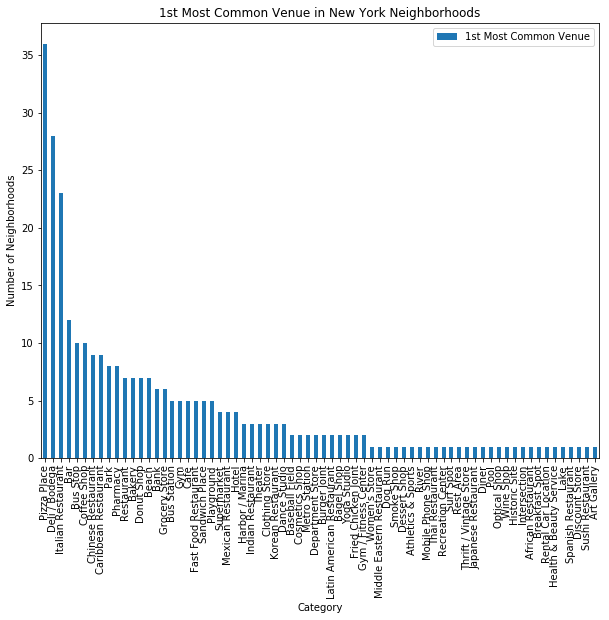

In [45]:
newyork_count1.plot(kind='bar', figsize=(10, 8))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('1st Most Common Venue in New York Neighborhoods') # add title to the plot

plt.show()

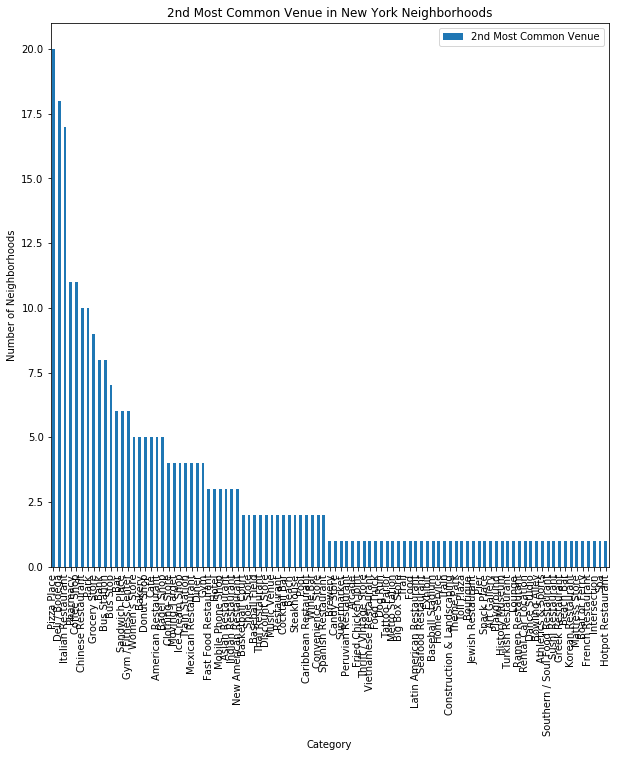

In [46]:
newyork_count2.plot(kind='bar', figsize=(10, 10))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('2nd Most Common Venue in New York Neighborhoods') # add title to the plot

plt.show()

In [47]:
newyork_count1.head(10)

1st Most Common Venue
Pizza Place                              36
Deli / Bodega                            28
Italian Restaurant                       23
Bar                                      12
Bus Stop                                 10
Coffee Shop                              10
Chinese Restaurant                        9
Caribbean Restaurant                      9
Park                                      8
Pharmacy                                  8

In [48]:
newyork_count2.head(10)

2nd Most Common Venue
Pizza Place                            20
Deli / Bodega                          18
Italian Restaurant                     17
Pharmacy                               11
Coffee Shop                            11
Chinese Restaurant                     10
Park                                   10
Grocery Store                           9
Bank                                    8
Bus Station                             8

In [49]:
newyork_count3.head(10)

3rd Most Common Venue
Deli / Bodega                            18
Pizza Place                              18
Coffee Shop                              12
Italian Restaurant                       11
Bank                                     10
Donut Shop                                9
Mexican Restaurant                        8
Fast Food Restaurant                      7
Sandwich Place                            7
Chinese Restaurant                        7

The first ten elements of these tables are nearly the same. So, we can analize only the first table.

In [50]:
newyork_top10=newyork_count1.head(10)
newyork_top10

1st Most Common Venue
Pizza Place                              36
Deli / Bodega                            28
Italian Restaurant                       23
Bar                                      12
Bus Stop                                 10
Coffee Shop                              10
Chinese Restaurant                        9
Caribbean Restaurant                      9
Park                                      8
Pharmacy                                  8

In [51]:
newyork_top10.sum(axis = 0, skipna = True) 

1st Most Common Venue    153
dtype: int64

There are other 60 categories which represent the half of the other neighborhoods, so we add this value as "others".

In [52]:
newyork_top10.loc['Others'] = 149
newyork_top10

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1st Most Common Venue
Pizza Place                              36
Deli / Bodega                            28
Italian Restaurant                       23
Bar                                      12
Bus Stop                                 10
Coffee Shop                              10
Chinese Restaurant                        9
Caribbean Restaurant                      9
Park                                      8
Pharmacy                                  8
Others                                  149

Graph the 1st top 10.

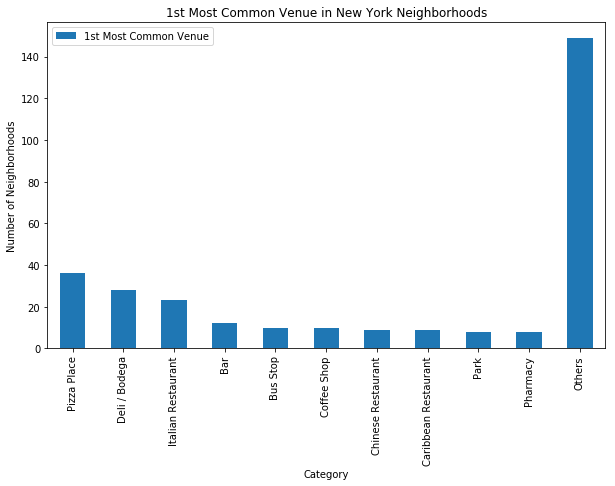

In [58]:
newyork_top10.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('1st Most Common Venue in New York Neighborhoods') # add title to the plot

plt.show()

In [59]:
newyork_top10_2=newyork_count2.head(10)
newyork_top10_2

2nd Most Common Venue
Pizza Place                            20
Deli / Bodega                          18
Italian Restaurant                     17
Pharmacy                               11
Coffee Shop                            11
Chinese Restaurant                     10
Park                                   10
Grocery Store                           9
Bank                                    8
Bus Station                             8

In [61]:
newyork_top10_2.sum(axis = 0, skipna = True) 

2nd Most Common Venue    122
dtype: int64

In [62]:
newyork_top10_2.loc['Others'] = 180
newyork_top10_2

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


2nd Most Common Venue
Pizza Place                            20
Deli / Bodega                          18
Italian Restaurant                     17
Pharmacy                               11
Coffee Shop                            11
Chinese Restaurant                     10
Park                                   10
Grocery Store                           9
Bank                                    8
Bus Station                             8
Others                                180

Graph the second top 10.

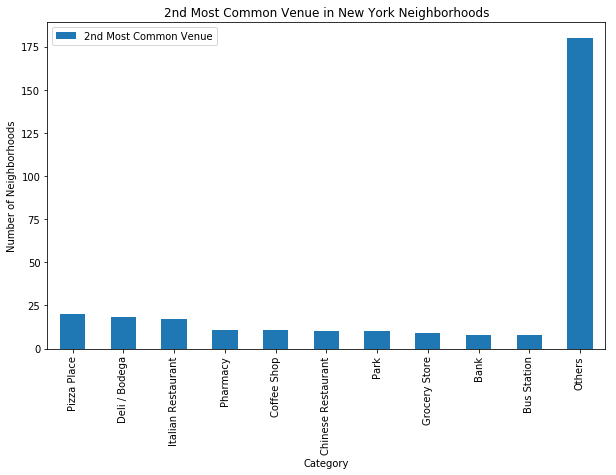

In [63]:
newyork_top10_2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('2nd Most Common Venue in New York Neighborhoods') # add title to the plot

plt.show()

In [64]:
newyork_top10_3=newyork_count3.head(10)
newyork_top10_3

3rd Most Common Venue
Deli / Bodega                            18
Pizza Place                              18
Coffee Shop                              12
Italian Restaurant                       11
Bank                                     10
Donut Shop                                9
Mexican Restaurant                        8
Fast Food Restaurant                      7
Sandwich Place                            7
Chinese Restaurant                        7

In [66]:
newyork_top10_3.sum(axis = 0, skipna = True) 

3rd Most Common Venue    107
dtype: int64

In [67]:
newyork_top10_3.loc['Others'] = 195
newyork_top10_3

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


3rd Most Common Venue
Deli / Bodega                            18
Pizza Place                              18
Coffee Shop                              12
Italian Restaurant                       11
Bank                                     10
Donut Shop                                9
Mexican Restaurant                        8
Fast Food Restaurant                      7
Sandwich Place                            7
Chinese Restaurant                        7
Others                                  195

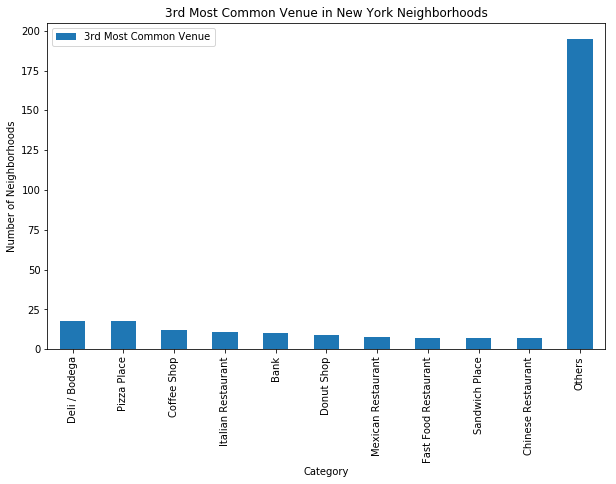

In [68]:
newyork_top10_3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('3rd Most Common Venue in New York Neighborhoods') # add title to the plot

plt.show()

# Repeat the analysis with Toronto

In [69]:
d=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header=0)
d

[    Postcode           Borough  \
 0        M1A      Not assigned   
 1        M2A      Not assigned   
 2        M3A        North York   
 3        M4A        North York   
 4        M5A  Downtown Toronto   
 5        M5A  Downtown Toronto   
 6        M6A        North York   
 7        M6A        North York   
 8        M7A      Queen's Park   
 9        M8A      Not assigned   
 10       M9A         Etobicoke   
 11       M1B       Scarborough   
 12       M1B       Scarborough   
 13       M2B      Not assigned   
 14       M3B        North York   
 15       M4B         East York   
 16       M4B         East York   
 17       M5B  Downtown Toronto   
 18       M5B  Downtown Toronto   
 19       M6B        North York   
 20       M7B      Not assigned   
 21       M8B      Not assigned   
 22       M9B         Etobicoke   
 23       M9B         Etobicoke   
 24       M9B         Etobicoke   
 25       M9B         Etobicoke   
 26       M9B         Etobicoke   
 27       M1C       

In [70]:
d0=d[0]

import numpy as np
d0.replace("Not assigned", np.nan, inplace=True)
d0

Postcode           Borough  \
0        M1A               NaN   
1        M2A               NaN   
2        M3A        North York   
3        M4A        North York   
4        M5A  Downtown Toronto   
5        M5A  Downtown Toronto   
6        M6A        North York   
7        M6A        North York   
8        M7A      Queen's Park   
9        M8A               NaN   
10       M9A         Etobicoke   
11       M1B       Scarborough   
12       M1B       Scarborough   
13       M2B               NaN   
14       M3B        North York   
15       M4B         East York   
16       M4B         East York   
17       M5B  Downtown Toronto   
18       M5B  Downtown Toronto   
19       M6B        North York   
20       M7B               NaN   
21       M8B               NaN   
22       M9B         Etobicoke   
23       M9B         Etobicoke   
24       M9B         Etobicoke   
25       M9B         Etobicoke   
26       M9B         Etobicoke   
27       M1C       Scarborough   
28       M1C       Scarborough   
29       M1C       Scarborough   
30       M2C               NaN   
31       M3C        North York   
32       M3C        North York   
33       M4C         East York   
34       M5C  Downtown Toronto   
35       M6C              York   
36       M7C               NaN   
37       M8C               NaN   
38       M9C         Etobicoke   
39       M9C         Etobicoke   
40       M9C         Etobicoke   
41       M9C         Etobicoke   
42       M1E       Scarborough   
43       M1E       Scarborough   
44       M1E       Scarborough   
45       M2E               NaN   
46       M3E               NaN   
47       M4E      East Toronto   
48       M5E  Downtown Toronto   
49       M6E              York   
50       M7E               NaN   
51       M8E               NaN   
52       M9E               NaN   
53       M1G       Scarborough   
54       M2G               NaN   
55       M3G               NaN   
56       M4G         East York   
57       M5G  Downtown Toronto   
58       M6G  Downtown Toronto   
59       M7G               NaN   
60       M8G               NaN   
61       M9G               NaN   
62       M1H       Scarborough   
63       M2H        North York   
64       M3H        North York   
65       M3H        North York   
66       M3H        North York   
67       M4H         East York   
68       M5H  Downtown Toronto   
69       M5H  Downtown Toronto   
70       M5H  Downtown Toronto   
71       M6H      West Toronto   
72       M6H      West Toronto   
73       M7H               NaN   
74       M8H               NaN   
75       M9H               NaN   
76       M1J       Scarborough   
77       M2J        North York   
78       M2J        North York   
79       M2J        North York   
80       M3J        North York   
81       M3J        North York   
82       M4J         East York   
83       M5J  Downtown Toronto   
84       M5J  Downtown Toronto   
85       M5J  Downtown Toronto   
86       M6J      West Toronto   
87       M6J      West Toronto   
88       M7J               NaN   
89       M8J               NaN   
90       M9J               NaN   
91       M1K       Scarborough   
92       M1K       Scarborough   
93       M1K       Scarborough   
94       M2K        North York   
95       M3K        North York   
96       M3K        North York   
97       M4K      East Toronto   
98       M4K      East Toronto   
99       M5K  Downtown Toronto   
100      M5K  Downtown Toronto   
101      M6K      West Toronto   
102      M6K      West Toronto   
103      M6K      West Toronto   
104      M7K               NaN   
105      M8K               NaN   
106      M9K               NaN   
107      M1L       Scarborough   
108      M1L       Scarborough   
109      M1L       Scarborough   
110      M2L        North York   
111      M2L        North York   
112      M3L        North York   
113      M4L      East Toronto   
114      M4L      East Toronto   
115      M5L  Downtown Toronto   
116      M5L  Downtown Tor

In [71]:
d0.loc[d0['Neighbourhood'].isnull(),'Neighbourhood'] = d0['Borough']
d0.head()

Postcode           Borough     Neighbourhood
0      M1A               NaN               NaN
1      M2A               NaN               NaN
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront

In [72]:
d0.dropna(inplace=True)
d0.reset_index(drop=True, inplace=True)
d0.head()

Postcode           Borough     Neighbourhood
0      M3A        North York         Parkwoods
1      M4A        North York  Victoria Village
2      M5A  Downtown Toronto      Harbourfront
3      M5A  Downtown Toronto       Regent Park
4      M6A        North York  Lawrence Heights

In [74]:
d0.shape

(211, 3)

In [75]:
!wget -q -O 'coordinates.csv' https://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [76]:
coor=pd.read_csv('coordinates.csv')
coor.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [77]:
coordinates=pd.DataFrame(columns=['Latitude', 'Longitude'])
coordinates.head()

Empty DataFrame
Columns: [Latitude, Longitude]
Index: []

In [78]:
coor.shape

(103, 3)

In [80]:
for i in range(211):
    for j in range(103):
        if d0['Postcode'][i] == coor['Postal Code'][j]:
            coordinates = coordinates.append({'Latitude': coor['Latitude'][j], 'Longitude': coor['Longitude'][j]}, ignore_index=True)

coordinates

Latitude  Longitude
0    43.753259 -79.329656
1    43.725882 -79.315572
2    43.654260 -79.360636
3    43.654260 -79.360636
4    43.718518 -79.464763
5    43.718518 -79.464763
6    43.662301 -79.389494
7    43.667856 -79.532242
8    43.806686 -79.194353
9    43.806686 -79.194353
10   43.745906 -79.352188
11   43.706397 -79.309937
12   43.706397 -79.309937
13   43.657162 -79.378937
14   43.657162 -79.378937
15   43.709577 -79.445073
16   43.650943 -79.554724
17   43.650943 -79.554724
18   43.650943 -79.554724
19   43.650943 -79.554724
20   43.650943 -79.554724
21   43.784535 -79.160497
22   43.784535 -79.160497
23   43.784535 -79.160497
24   43.725900 -79.340923
25   43.725900 -79.340923
26   43.695344 -79.318389
27   43.651494 -79.375418
28   43.693781 -79.428191
29   43.643515 -79.577201
30   43.643515 -79.577201
31   43.643515 -79.577201
32   43.643515 -79.577201
33   43.763573 -79.188711
34   43.763573 -79.188711
35   43.763573 -79.188711
36   43.676357 -79.293031
37   43.644771 -79.373306
38   43.689026 -79.453512
39   43.770992 -79.216917
40   43.709060 -79.363452
41   43.657952 -79.387383
42   43.669542 -79.422564
43   43.773136 -79.239476
44   43.803762 -79.363452
45   43.754328 -79.442259
46   43.754328 -79.442259
47   43.754328 -79.442259
48   43.705369 -79.349372
49   43.650571 -79.384568
50   43.650571 -79.384568
51   43.650571 -79.384568
52   43.669005 -79.442259
53   43.669005 -79.442259
54   43.744734 -79.239476
55   43.778517 -79.346556
56   43.778517 -79.346556
57   43.778517 -79.346556
58   43.767980 -79.487262
59   43.767980 -79.487262
60   43.685347 -79.338106
61   43.640816 -79.381752
62   43.640816 -79.381752
63   43.640816 -79.381752
64   43.647927 -79.419750
65   43.647927 -79.419750
66   43.727929 -79.262029
67   43.727929 -79.262029
68   43.727929 -79.262029
69   43.786947 -79.385975
70   43.737473 -79.464763
71   43.737473 -79.464763
72   43.679557 -79.352188
73   43.679557 -79.352188
74   43.647177 -79.381576
75   43.647177 -79.381576
76   43.636847 -79.428191
77   43.636847 -79.428191
78   43.636847 -79.428191
79   43.711112 -79.284577
80   43.711112 -79.284577
81   43.711112 -79.284577
82   43.757490 -79.374714
83   43.757490 -79.374714
84   43.739015 -79.506944
85   43.668999 -79.315572
86   43.668999 -79.315572
87   43.648198 -79.379817
88   43.648198 -79.379817
89   43.713756 -79.490074
90   43.713756 -79.490074
91   43.713756 -79.490074
92   43.756303 -79.565963
93   43.716316 -79.239476
94   43.716316 -79.239476
95   43.716316 -79.239476
96   43.789053 -79.408493
97   43.789053 -79.408493
98   43.728496 -79.495697
99   43.659526 -79.340923
100  43.733283 -79.419750
101  43.733283 -79.419750
102  43.691116 -79.476013
103  43.691116 -79.476013
104  43.691116 -79.476013
105  43.691116 -79.476013
106  43.724766 -79.532242
107  43.724766 -79.532242
108  43.692657 -79.264848
109  43.692657 -79.264848
110  43.770120 -79.408493
111  43.761631 -79.520999
112  43.728020 -79.388790
113  43.711695 -79.416936
114  43.673185 -79.487262
115  43.673185 -79.487262
116  43.706876 -79.518188
117  43.757410 -79.273304
118  43.757410 -79.273304
119  43.757410 -79.273304
120  43.752758 -79.400049
121  43.712751 -79.390197
122  43.696948 -79.411307
123  43.696948 -79.411307
124  43.661608 -79.464763
125  43.661608 -79.464763
126  43.696319 -79.532242
127  43.750072 -79.295849
128  43.750072 -79.295849
129  43.782736 -79.442259
130  43.715383 -79.405678
131  43.672710 -79.405678
132  43.672710 -79.405678
133  43.672710 -79.405678
134  43.648960 -79.456325
135  43.648960 -79.456325
136  43.636966 -79.615819
137  43.688905 -79.554724
138  43.688905 -79.554724
139  43.688905 -79.554724
140  43.688905 -79.554724
141  43.794200 -79.262029
142  43.704324 -79.388790
143  43.662696 -79.400049
144  43.662696 -79.400049
145  43.651571 -79.484450
146  43.651571 -79.484450
147  43.781638 -79.304302
148  43.781638 -79.304302
149  43.781638 -79.304302
150  43.689574 -79.383160
151  43.689574 -79.383160
152  43.653206 -79.400049
15

In [82]:
d0['Latitude']=coordinates['Latitude']
d0['Longitude']=coordinates['Longitude']
d0.head()

Postcode           Borough     Neighbourhood   Latitude  Longitude
0      M3A        North York         Parkwoods  43.753259 -79.329656
1      M4A        North York  Victoria Village  43.725882 -79.315572
2      M5A  Downtown Toronto      Harbourfront  43.654260 -79.360636
3      M5A  Downtown Toronto       Regent Park  43.654260 -79.360636
4      M6A        North York  Lawrence Heights  43.718518 -79.464763

In [84]:
neighborhoods_toronto=d0[['Borough', 'Neighbourhood', 'Latitude', 'Longitude']]
neighborhoods_toronto.head()

Borough     Neighbourhood   Latitude  Longitude
0        North York         Parkwoods  43.753259 -79.329656
1        North York  Victoria Village  43.725882 -79.315572
2  Downtown Toronto      Harbourfront  43.654260 -79.360636
3  Downtown Toronto       Regent Park  43.654260 -79.360636
4        North York  Lawrence Heights  43.718518 -79.464763

In [85]:
neighborhoods_toronto.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)
neighborhoods_toronto.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Borough      Neighborhood   Latitude  Longitude
0        North York         Parkwoods  43.753259 -79.329656
1        North York  Victoria Village  43.725882 -79.315572
2  Downtown Toronto      Harbourfront  43.654260 -79.360636
3  Downtown Toronto       Regent Park  43.654260 -79.360636
4        North York  Lawrence Heights  43.718518 -79.464763

In [88]:
toronto_latitude=43.651070
toronto_longitude=-79.347015

map_toronto = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_toronto['Latitude'], neighborhoods_toronto['Longitude'], neighborhoods_toronto['Borough'], neighborhoods_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [89]:
toronto_venues = getNearbyVenues(names=neighborhoods_toronto['Neighborhood'],
                                   latitudes=neighborhoods_toronto['Latitude'],
                                   longitudes=neighborhoods_toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront
Regent Park
Lawrence Heights
Lawrence Manor
Queen's Park
Islington Avenue
Rouge
Malvern
Don Mills North
Woodbine Gardens
Parkview Hill
Ryerson
Garden District
Glencairn
Cloverdale
Islington
Martin Grove
Princess Gardens
West Deane Park
Highland Creek
Rouge Hill
Port Union
Flemingdon Park
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens
Eringate
Markland Wood
Old Burnhamthorpe
Guildwood
Morningside
West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor
Downsview North
Wilson Heights
Thorncliffe Park
Adelaide
King
Richmond
Dovercourt Village
Dufferin
Scarborough Village
Fairview
Henry Farm
Oriole
Northwood Park
York University
East Toronto
Harbourfront East
Toronto Islands
Union Station
Little Portugal
Trinity
East Birchmount Park
Ionview
Kennedy Park
Bayview Village
CFB Toronto
Downsview East
The Danforth West
Riverdale
Design E

Check the size of this new dataframe.

In [90]:
print(toronto_venues.shape)
toronto_venues.head()

(4437, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2         Parkwoods              43.753259              -79.329656   
3  Victoria Village              43.725882              -79.315572   
4  Victoria Village              43.725882              -79.315572   

                    Venue  Venue Latitude  Venue Longitude  \
0         Brookbanks Park       43.751976       -79.332140   
1                     KFC       43.754387       -79.333021   
2           Variety Store       43.751974       -79.333114   
3  Victoria Village Arena       43.723481       -79.315635   
4             Tim Hortons       43.725517       -79.313103   

         Venue Category  
0                  Park  
1  Fast Food Restaurant  
2     Food & Drink Shop  
3          Hockey Arena  
4           Coffee Shop

Group dataframe.

In [91]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns1 = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns1]

toronto_onehot.head()

Yoga Studio  Accessories Store  Afghan Restaurant  Airport  \
0            0                  0                  0        0   
1            0                  0                  0        0   
2            0                  0                  0        0   
3            0                  0                  0        0   
4            0                  0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0              0          0           0           0       0   
1            0              0          0           0           0       0   
2            0              0          0           0           0       0   
3            0              0          0           0           0       0   
4            0              0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0     0    0               0                 0                 0   
1     0    0               0                 0                 0   
2     0    0               0                 0                 0   
3     0    0               0                 0                 0   
4     0    0               0                 0                 0   

   Basketball Stadium  Beach  Beer Bar  Beer Store  Belgian Restaurant  \
0                   0      0         0           0                   0   
1                   0      0         0           0                   0   
2                   0      0         0           0                   0   
3                   0      0         0           0                   0   
4                   0      0         0           0                   0   

   Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0          0       0           0              0          0         0   
1          0       0           0              0          0         0   
2          0       0           0              0          0         0   
3          0       0           0              0          0         0   
4          0       0           0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0 

In [92]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  \
0                                             Adelaide     0.000000   
1                                            Agincourt     0.000000   
2                                      Agincourt North     0.000000   
3                                       Albion Gardens     0.000000   
4                                            Alderwood     0.000000   
5                                       Bathurst Manor     0.000000   
6                                        Bathurst Quay     0.000000   
7                                      Bayview Village     0.000000   
8                                     Beaumond Heights     0.000000   
9                                         Bedford Park     0.000000   
10                                         Berczy Park     0.000000   
11                                         Birch Cliff     0.000000   
12                                   Bloordale Gardens     0.000000   
13                                            Brockton     0.000000   
14   Business Reply Mail Processing Centre 969 Eastern     0.058824   
15                                         CFB Toronto     0.000000   
16                                            CN Tower     0.000000   
17                                         Cabbagetown     0.000000   
18                                 Caledonia-Fairbanks     0.000000   
19               Canada Post Gateway Processing Centre     0.000000   
20                                           Cedarbrae     0.000000   
21                                  Central Bay Street     0.011236   
22                                           Chinatown     0.000000   
23                                            Christie     0.000000   
24                                Church and Wellesley     0.011236   
25                                            Clairlea     0.000000   
26                                      Clarks Corners     0.000000   
27                                          Cliffcrest     0.000000   
28                                           Cliffside     0.000000   
29                                      Cliffside West     0.000000   
30                                          Cloverdale     0.000000   
31                                      Commerce Court     0.000000   
32                                          Davisville     0.000000   
33                                    Davisville North     0.000000   
34                                           Deer Park     0.000000   
35                                             Del Ray     0.000000   
36                                     Design Exchange     0.000000   
37                                     Don Mills North     0.000000   
38                                     Don Mills South     0.000000   
39                                         Dorset Park     0.000000   
40                                  Dovercourt Village     0.000000   
41                                           Downsview     0.000000   
42                                   Downsview Central     0.000000   
43                                      Downsview East     0.000000   
44                                     Downsview North     0.000000   
45                                 Downsview Northwest     0.000000   
46                                      Downsview West     0.000000   
47                                            Dufferin     0.000000   
48                                East Birchmount Park     0.000000   
49                                        East Toronto     0.000000   
50                                               Emery     0.000000   
51                                            Eringate     0.000000   
52                                    Exhibition Place     0.000000   
53                                            Fairview     0.000000   
54                                First Canadian Place     0.000000   
55                                     Flemingdon Park     0.00000

In [93]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
toronto_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Adelaide           Coffee Shop                  Café   
1        Agincourt                Lounge        Sandwich Place   
2  Agincourt North            Playground                  Park   
3   Albion Gardens         Grocery Store           Pizza Place   
4        Alderwood           Pizza Place           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Steakhouse       Thai Restaurant                   Bar   
1        Clothing Store        Breakfast Spot         Women's Store   
2         Women's Store            Donut Shop    Dim Sum Restaurant   
3           Coffee Shop        Sandwich Place  Fast Food Restaurant   
4    Athletics & Sports              Pharmacy                  Pool   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Hotel      Asian Restaurant                   Gym   
1            Donut Shop        Discount Store              Dive Bar   
2                 Diner        Discount Store              Dive Bar   
3            Beer Store   Fried Chicken Joint              Pharmacy   
4                   Pub        Sandwich Place          Skating Rink   

  9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
0   American Restaurant           Burger Joint             Restaurant   
1               Dog Run       Doner Restaurant    Dumpling Restaurant   
2               Dog Run       Doner Restaurant              Drugstore   
3   Dumpling Restaurant              Drugstore       Department Store   
4                   Gym       Airport Terminal    American Restaurant   

  12th Most Common Venue 13th Most Common Venue       14th Most Common Venue  \
0         Cosmetics Shop                 Bakery             Sushi Restaurant   
1              Drugstore     Dim Sum Restaurant  Eastern European Restaurant   
2       Department Store    Dumpling Restaurant  Eastern European Restaurant   
3       Doner Restaurant                Dog Run                     Dive Bar   
4   Ethiopian Restaurant    Empanada Restaurant            Electronics Store   

        15th Most Common Venue 16th Most Common Venue  \
0               Breakfast Spot            Salad Place   
1            Electronics Store    Empanada Restaurant   
2            Electronics Store    Empanada Restaurant   
3               Discount Store                  Diner   
4  Eastern European Restaurant    Dumpling Restaurant   

        17th Most Common Venue 18th Most Common Venue 19th Most Common Venue  \
0                  Pizza Place           Concert Hall              Gastropub   
1         Ethiopian Restaurant                  Diner           Dessert Shop   
2         Ethiopian Restaurant           Dessert Shop          Deli / Bodega   
3  Eastern European Restaurant     Dim Sum Restaurant           Dessert Shop   
4                    Drugstore             Donut Shop       Doner Restaurant   

  20th Most Common Venue  
0              Jazz Club  
1     Falafel Restaurant  
2     College Rec Center  
3             Donut Shop  
4                Dog Run

Check the size of this new dataframe.

In [96]:
toronto_neighborhoods_venues_sorted.shape

(203, 21)

Check how many unique categories there are.

In [97]:
print('There are {} uniques categories.'.format(len(toronto_neighborhoods_venues_sorted['1st Most Common Venue'].unique())))

There are 47 uniques categories.


In [98]:
toronto_count1 = pd.DataFrame(toronto_neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()) 
toronto_count2 = pd.DataFrame(toronto_neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts())
toronto_count3 = pd.DataFrame(toronto_neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts()) 

Count categories.

In [99]:
toronto_top10=toronto_count1.head(10)
toronto_top10

1st Most Common Venue
Coffee Shop                         33
Pizza Place                         17
Café                                15
Baseball Field                      11
Grocery Store                       10
Airport Service                      7
Playground                           6
Pet Store                            6
Hardware Store                       5
Bank                                 5

In [100]:
toronto_top10.sum(axis = 0, skipna = True) 

1st Most Common Venue    115
dtype: int64

In [101]:
toronto_top10.loc['Others'] = 88
toronto_top10

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1st Most Common Venue
Coffee Shop                         33
Pizza Place                         17
Café                                15
Baseball Field                      11
Grocery Store                       10
Airport Service                      7
Playground                           6
Pet Store                            6
Hardware Store                       5
Bank                                 5
Others                              88

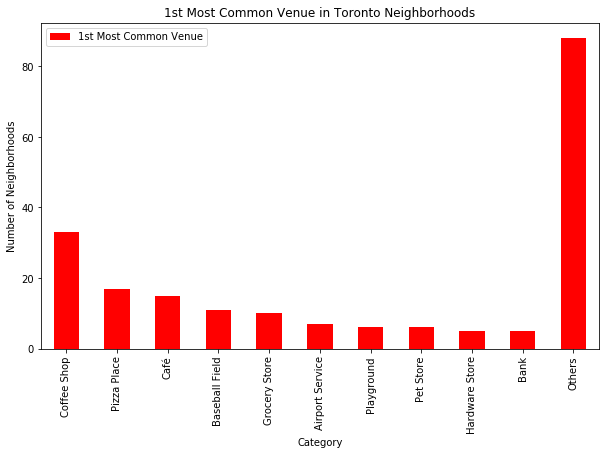

In [104]:
toronto_top10.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('1st Most Common Venue in Toronto Neighborhoods') # add title to the plot

plt.show()

In [105]:
toronto_top10_2=toronto_count2.head(10)
toronto_top10_2

2nd Most Common Venue
Coffee Shop                              23
Park                                     20
Café                                     15
Pizza Place                              13
Women's Store                            10
Pool                                      9
Bakery                                    8
Sandwich Place                            7
Airport Terminal                          7
Fast Food Restaurant                      6

In [106]:
toronto_top10_2.sum(axis = 0, skipna = True) 

2nd Most Common Venue    118
dtype: int64

In [107]:
toronto_top10_2.loc['Others'] = 85
toronto_top10_2

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


2nd Most Common Venue
Coffee Shop                              23
Park                                     20
Café                                     15
Pizza Place                              13
Women's Store                            10
Pool                                      9
Bakery                                    8
Sandwich Place                            7
Airport Terminal                          7
Fast Food Restaurant                      6
Others                                   85

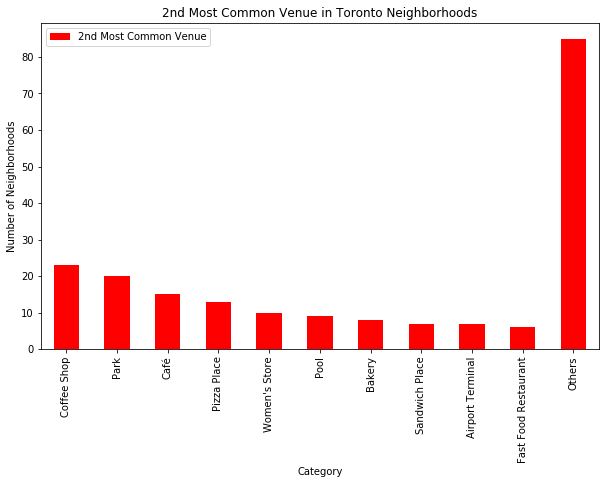

In [108]:
toronto_top10_2.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('2nd Most Common Venue in Toronto Neighborhoods') # add title to the plot

plt.show()

In [109]:
toronto_top10_3=toronto_count3.head(10)
toronto_top10_3

3rd Most Common Venue
Women's Store                            21
Coffee Shop                              20
Convenience Store                        10
Park                                      9
Drugstore                                 8
Discount Store                            8
Fast Food Restaurant                      7
Hotel                                     7
Airport Lounge                            7
Supermarket                               6

In [111]:
toronto_top10_3.sum(axis = 0, skipna = True) 

3rd Most Common Venue    103
dtype: int64

In [112]:
toronto_top10_3.loc['Others'] = 100
toronto_top10_3

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


3rd Most Common Venue
Women's Store                            21
Coffee Shop                              20
Convenience Store                        10
Park                                      9
Drugstore                                 8
Discount Store                            8
Fast Food Restaurant                      7
Hotel                                     7
Airport Lounge                            7
Supermarket                               6
Others                                  100

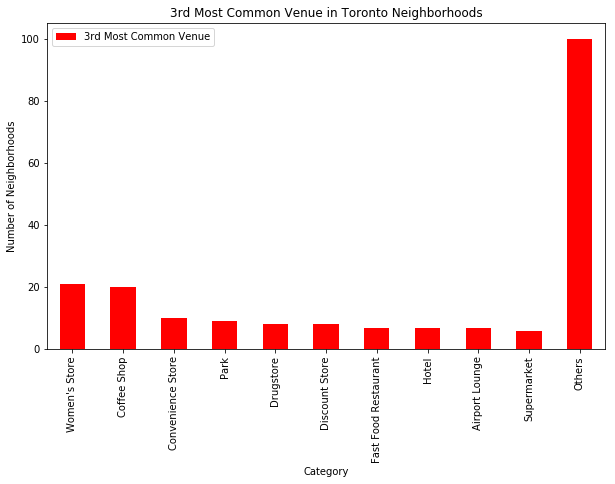

In [113]:
toronto_top10_3.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('3rd Most Common Venue in Toronto Neighborhoods') # add title to the plot

plt.show()

# Analyze competition in the first 20 most popular venues in New York

In [118]:
newyork_neighborhoods_venues_sorted_transposed = newyork_neighborhoods_venues_sorted
newyork_neighborhoods_venues_sorted_transposed.set_index('Neighborhood', inplace=True)
newyork_neighborhoods_venues_sorted_transposed.head()

1st Most Common Venue 2nd Most Common Venue  \
Neighborhood                                                
Allerton                Pizza Place         Deli / Bodega   
Annadale                 Restaurant         Train Station   
Arden Heights              Pharmacy           Pizza Place   
Arlington              Intersection              Bus Stop   
Arrochar         Italian Restaurant              Bus Stop   

              3rd Most Common Venue       4th Most Common Venue  \
Neighborhood                                                      
Allerton                Supermarket                         Spa   
Annadale                      Diner              Cosmetics Shop   
Arden Heights           Coffee Shop                  Playground   
Arlington             Boat or Ferry  Construction & Landscaping   
Arrochar              Deli / Bodega                  Taco Place   

                   5th Most Common Venue     6th Most Common Venue  \
Neighborhood                                                         
Allerton              Chinese Restaurant          Department Store   
Annadale                        Pharmacy                 Pet Store   
Arden Heights              Women's Store                   Exhibit   
Arlington            American Restaurant             Grocery Store   
Arrochar       Middle Eastern Restaurant  Mediterranean Restaurant   

              7th Most Common Venue 8th Most Common Venue  \
Neighborhood                                                
Allerton               Liquor Store           Gas Station   
Annadale                       Park                  Food   
Arden Heights               Factory    Falafel Restaurant   
Arlington             Deli / Bodega  Fast Food Restaurant   
Arrochar                 Bagel Shop           Pizza Place   

              9th Most Common Venue 10th Most Common Venue  \
Neighborhood                                                 
Allerton             Breakfast Spot     Spanish Restaurant   
Annadale                 Sports Bar                 Bakery   
Arden Heights                  Farm         Farmers Market   
Arlington                     Field    Filipino Restaurant   
Arrochar             Sandwich Place  Outdoors & Recreation   

              11th Most Common Venue      12th Most Common Venue  \
Neighborhood                                                       
Allerton                        Food        Fast Food Restaurant   
Annadale                Dance Studio         American Restaurant   
Arden Heights   Fast Food Restaurant                       Field   
Arlington                       Food  Financial or Legal Service   
Arrochar                       Hotel          Athletics & Sports   

              13th Most Common Venue      14th Most Common Venue  \
Neighborhood                                                       
Allerton         Fried Chicken Joint           Martial Arts Dojo   
Annadale         Indie Movie Theater                 Event Space   
Arden Heights    Filipino Restaurant  Financial or Legal Service   
Arlington          Fish & Chips Shop                 Fish Market   
Arrochar                 Supermarket              Cosmetics Shop   

              15th Most Common Venue      16th Most Common Venue  \
Neighborhood                                                       
Allerton                    Pharmacy              Discount Store   
Annadale                   Irish Pub                Intersection   
Arden Heights      Fish & Chips Shop                 Fish Market   
Arlington             Farmers Market                 Flea Market   
Arrochar                  Food Truck  Financial or Legal Service   

              17th Most Common Venue 18th Most Common Venue  \
Neighborhood                                                  
Allerton                  Donut Shop           Dessert Shop   
Annadale                  Eye Doctor                Factory   
Arden Heights            Flea Market            Flower Shop   
Arlington       

In [119]:
newyork_neighborhoods_venues_sorted_transposed = newyork_neighborhoods_venues_sorted_transposed.transpose()
newyork_neighborhoods_venues_sorted_transposed.head()

Neighborhood                     Allerton        Annadale  Arden Heights  \
1st Most Common Venue         Pizza Place      Restaurant       Pharmacy   
2nd Most Common Venue       Deli / Bodega   Train Station    Pizza Place   
3rd Most Common Venue         Supermarket           Diner    Coffee Shop   
4th Most Common Venue                 Spa  Cosmetics Shop     Playground   
5th Most Common Venue  Chinese Restaurant        Pharmacy  Women's Store   

Neighborhood                            Arlington                   Arrochar  \
1st Most Common Venue                Intersection         Italian Restaurant   
2nd Most Common Venue                    Bus Stop                   Bus Stop   
3rd Most Common Venue               Boat or Ferry              Deli / Bodega   
4th Most Common Venue  Construction & Landscaping                 Taco Place   
5th Most Common Venue         American Restaurant  Middle Eastern Restaurant   

Neighborhood                   Arverne                    Astoria  \
1st Most Common Venue        Surf Spot  Middle Eastern Restaurant   
2nd Most Common Venue    Metro Station                        Bar   
3rd Most Common Venue   Sandwich Place           Greek Restaurant   
4th Most Common Venue  Thai Restaurant                 Hookah Bar   
5th Most Common Venue  Bed & Breakfast         Seafood Restaurant   

Neighborhood              Astoria Heights          Auburndale     Bath Beach  \
1st Most Common Venue          Playground  Italian Restaurant    Pizza Place   
2nd Most Common Venue  Italian Restaurant  Athletics & Sports       Pharmacy   
3rd Most Common Venue  Chinese Restaurant        Noodle House  Women's Store   
4th Most Common Venue         Bus Station   Mobile Phone Shop     Kids Store   
5th Most Common Venue        Burger Joint  Miscellaneous Shop     Donut Shop   

Neighborhood          Battery Park City           Bay Ridge     Bay Terrace  \
1st Most Common Venue       Coffee Shop  Italian Restaurant  Clothing Store   
2nd Most Common Venue              Park                 Spa      Donut Shop   
3rd Most Common Venue             Hotel         Pizza Place     Supermarket   
4th Most Common Venue     Memorial Site    Greek Restaurant   Women's Store   
5th Most Common Venue               Gym     Thai Restaurant  Lingerie Store   

Neighborhood                    Baychester              Bayside  \
1st Most Common Venue           Donut Shop                  Bar   
2nd Most Common Venue       Mattress Store    Indian Restaurant   
3rd Most Common Venue           Playground          Pizza Place   
4th Most Common Venue  Fried Chicken Joint  American Restaurant   
5th Most Common Venue   Spanish Restaurant     Sushi Restaurant   

Neighborhood                    Bayswater        Bedford Park  \
1st Most Common Venue          Playground         Pizza Place   
2nd Most Common Venue                Park               Diner   
3rd Most Common Venue       Women's Store       Deli / Bodega   
4th Most Common Venue         Flea Market      Sandwich Place   
5th Most Common Venue  Falafel Restaurant  Chinese Restaurant   

Neighborhood          Bedford Stuyvesant            Beechhurst  \
1st Most Common Venue        Pizza Place           Yoga Studio   
2nd Most Common Venue               Café  Gym / Fitness Center   
3rd Most Common Venue      Deli / Bodega          Dessert Shop   
4th Most Common Venue        Coffee Shop            Donut Shop   
5th Most Common Venue                Bar           Pizza Place   

Neighborhood                     Bellaire        Belle Harbor  \
1st Most Common Venue       Deli / Bodega               Beach   
2nd Most Common Venue  Chinese Restaurant       Deli / Bodega   
3rd Most Common Venue    Halal Restaurant                 Spa   
4th Most Common Venue       Moving Target                 Pub   
5th Most Common Venue    Greek Restaurant  Italian Restaurant   

Neighborhood                    Bellerose             Belmont  \
1st Most Common Venue  Chinese Restaurant  I

In [121]:
len(newyork_neighborhoods_venues_sorted_transposed['Allerton'].unique())

20

In [159]:
newyork_unique=pd.DataFrame(columns=['Unique Categories'])
newyork_unique.head()

Empty DataFrame
Columns: [Unique Categories]
Index: []

In [160]:
for i in range(0,302):
    newyork_unique = newyork_unique.append({'Unique Categories': len(newyork_neighborhoods_venues_sorted_transposed.iloc[:, i].unique())}, ignore_index=True)

newyork_unique

Unique Categories
0                  20
1                  20
2                  20
3                  20
4                  20
5                  20
6                  20
7                  20
8                  20
9                  20
10                 20
11                 20
12                 20
13                 20
14                 20
15                 20
16                 20
17                 20
18                 20
19                 20
20                 20
21                 20
22                 20
23                 20
24                 20
25                 20
26                 20
27                 20
28                 20
29                 20
30                 20
31                 20
32                 20
33                 20
34                 20
35                 20
36                 20
37                 20
38                 20
39                 20
40                 20
41                 20
42                 20
43                 20
44                 20
45                 20
46                 20
47                 20
48                 20
49                 20
50                 20
51                 20
52                 20
53                 20
54                 20
55                 20
56                 20
57                 20
58                 20
59                 20
60                 20
61                 20
62                 20
63                 20
64                 20
65                 20
66                 20
67                 20
68                 20
69                 20
70                 20
71                 20
72                 20
73                 20
74                 20
75                 20
76                 20
77                 20
78                 20
79                 20
80                 20
81                 20
82                 20
83                 20
84                 20
85                 20
86                 20
87                 20
88                 20
89                 20
90                 20
91                 20
92                 20
93                 20
94                 20
95                 20
96                 20
97                 20
98                 20
99                 20
100                20
101                20
102                20
103                20
104                20
105                20
106                20
107                20
108                20
109                20
110                20
111                20
112                20
113                20
114                20
115                20
116                20
117                20
118                20
119                20
120                20
121                20
122                20
123                20
124                20
125                20
126                20
127                20
128                20
129                20
130                20
131                20
132                20
133                20
134                20
135                20
136                20
137                20
138                20
139                20
140                20
141                20
142                20
143                20
144                20
145                20
146                20
147                20
148                20
149                20
150                20
151                20
152                20
153                20
154                20
155                20
156                20
157                20
158                20
159                20
160                20
161                20
162                20
163                20
164                20
165                20
166                20
167                20
168                20
169                20
170                20
171                20
172                20
173                20
174                20
175                20
176                20
177                20
178                20
179                20
180                20


In [161]:
newyork_unique['Neighborhoods']=newyork_neighborhoods_venues_sorted_transposed.columns
newyork_unique

Unique Categories              Neighborhoods
0                  20                   Allerton
1                  20                   Annadale
2                  20              Arden Heights
3                  20                  Arlington
4                  20                   Arrochar
5                  20                    Arverne
6                  20                    Astoria
7                  20            Astoria Heights
8                  20                 Auburndale
9                  20                 Bath Beach
10                 20          Battery Park City
11                 20                  Bay Ridge
12                 20                Bay Terrace
13                 20                 Baychester
14                 20                    Bayside
15                 20                  Bayswater
16                 20               Bedford Park
17                 20         Bedford Stuyvesant
18                 20                 Beechhurst
19                 20                   Bellaire
20                 20               Belle Harbor
21                 20                  Bellerose
22                 20                    Belmont
23                 20                Bensonhurst
24                 20               Bergen Beach
25                 20                 Blissville
26                 20                 Bloomfield
27                 20                Boerum Hill
28                 20               Borough Park
29                 20               Breezy Point
30                 20                  Briarwood
31                 20             Brighton Beach
32                 20              Broad Channel
33                 20          Broadway Junction
34                 20                  Bronxdale
35                 20           Brooklyn Heights
36                 20                 Brookville
37                 20                Brownsville
38                 20                 Bulls Head
39                 20                   Bushwick
40                 20               Butler Manor
41                 20            Cambria Heights
42                 20                   Canarsie
43                 20              Carnegie Hill
44                 20            Carroll Gardens
45                 20                Castle Hill
46                 20          Castleton Corners
47                 20             Central Harlem
48                 20                 Charleston
49                 20                    Chelsea
50                 20                  Chinatown
51                 20                City Island
52                 20                  City Line
53                 20               Civic Center
54                 20          Claremont Village
55                 20               Clason Point
56                 20                    Clifton
57                 20                    Clinton
58                 20               Clinton Hill
59                 20                 Co-op City
60                 20                Cobble Hill
61                 20              College Point
62                 20                    Concord
63                 20                  Concourse
64                 20          Concourse Village
65                 20               Coney Island
66                 20                     Corona
67                 20               Country Club
68                 20              Crown Heights
69                 20              Cypress Hills
70                 20                Ditmas Park
71                 20               Dongan Hills
72                 20                 Douglaston
73                 20                   Downtown
74                 20                      Dumbo
75                 20              Dyker Heights
76                 20              East Elmhurst
77                 20              East Flatbush
78                 20                East Harlem
79                 20              East New York
80                 20              

In [162]:
len(newyork_unique['Unique Categories'].unique())

1

In [163]:
newyork_unique.head(10)

Unique Categories    Neighborhoods
0                20         Allerton
1                20         Annadale
2                20    Arden Heights
3                20        Arlington
4                20         Arrochar
5                20          Arverne
6                20          Astoria
7                20  Astoria Heights
8                20       Auburndale
9                20       Bath Beach

In [164]:
toronto_neighborhoods_venues_sorted_transposed = toronto_neighborhoods_venues_sorted
toronto_neighborhoods_venues_sorted_transposed.set_index('Neighborhood', inplace=True)
toronto_neighborhoods_venues_sorted_transposed.head()

1st Most Common Venue 2nd Most Common Venue  \
Neighborhood                                                  
Adelaide                  Coffee Shop                  Café   
Agincourt                      Lounge        Sandwich Place   
Agincourt North            Playground                  Park   
Albion Gardens          Grocery Store           Pizza Place   
Alderwood                 Pizza Place           Coffee Shop   

                3rd Most Common Venue 4th Most Common Venue  \
Neighborhood                                                  
Adelaide                   Steakhouse       Thai Restaurant   
Agincourt              Clothing Store        Breakfast Spot   
Agincourt North         Women's Store            Donut Shop   
Albion Gardens            Coffee Shop        Sandwich Place   
Alderwood          Athletics & Sports              Pharmacy   

                5th Most Common Venue 6th Most Common Venue  \
Neighborhood                                                  
Adelaide                          Bar                 Hotel   
Agincourt               Women's Store            Donut Shop   
Agincourt North    Dim Sum Restaurant                 Diner   
Albion Gardens   Fast Food Restaurant            Beer Store   
Alderwood                        Pool                   Pub   

                7th Most Common Venue 8th Most Common Venue  \
Neighborhood                                                  
Adelaide             Asian Restaurant                   Gym   
Agincourt              Discount Store              Dive Bar   
Agincourt North        Discount Store              Dive Bar   
Albion Gardens    Fried Chicken Joint              Pharmacy   
Alderwood              Sandwich Place          Skating Rink   

                9th Most Common Venue 10th Most Common Venue  \
Neighborhood                                                   
Adelaide          American Restaurant           Burger Joint   
Agincourt                     Dog Run       Doner Restaurant   
Agincourt North               Dog Run       Doner Restaurant   
Albion Gardens    Dumpling Restaurant              Drugstore   
Alderwood                         Gym       Airport Terminal   

                11th Most Common Venue 12th Most Common Venue  \
Neighborhood                                                    
Adelaide                    Restaurant         Cosmetics Shop   
Agincourt          Dumpling Restaurant              Drugstore   
Agincourt North              Drugstore       Department Store   
Albion Gardens        Department Store       Doner Restaurant   
Alderwood          American Restaurant   Ethiopian Restaurant   

                13th Most Common Venue       14th Most Common Venue  \
Neighborhood                                                          
Adelaide                        Bakery             Sushi Restaurant   
Agincourt           Dim Sum Restaurant  Eastern European Restaurant   
Agincourt North    Dumpling Restaurant  Eastern European Restaurant   
Albion Gardens                 Dog Run                     Dive Bar   
Alderwood          Empanada Restaurant            Electronics Store   

                      15th Most Common Venue 16th Most Common Venue  \
Neighborhood                                                          
Adelaide                      Breakfast Spot            Salad Place   
Agincourt                  Electronics Store    Empanada Restaurant   
Agincourt North            Electronics Store    Empanada Restaurant   
Albion Gardens                Discount Store                  Diner   
Alderwood        Eastern European Restaurant    Dumpling Restaurant   

                      17th Most Common Venue 18th Most Common Venue  \
Neighborhood                                                          
Adelaide                         Pizza Place           Concert Hall   
Agincourt               Ethiopian Restaurant                  Diner   
Agincourt North         Ethiopian Restaurant           Dessert 

In [165]:
toronto_neighborhoods_venues_sorted_transposed = toronto_neighborhoods_venues_sorted_transposed.transpose()
toronto_neighborhoods_venues_sorted_transposed.head()

Neighborhood                  Adelaide       Agincourt     Agincourt North  \
1st Most Common Venue      Coffee Shop          Lounge          Playground   
2nd Most Common Venue             Café  Sandwich Place                Park   
3rd Most Common Venue       Steakhouse  Clothing Store       Women's Store   
4th Most Common Venue  Thai Restaurant  Breakfast Spot          Donut Shop   
5th Most Common Venue              Bar   Women's Store  Dim Sum Restaurant   

Neighborhood                 Albion Gardens           Alderwood  \
1st Most Common Venue         Grocery Store         Pizza Place   
2nd Most Common Venue           Pizza Place         Coffee Shop   
3rd Most Common Venue           Coffee Shop  Athletics & Sports   
4th Most Common Venue        Sandwich Place            Pharmacy   
5th Most Common Venue  Fast Food Restaurant                Pool   

Neighborhood             Bathurst Manor     Bathurst Quay  \
1st Most Common Venue       Coffee Shop   Airport Service   
2nd Most Common Venue          Pharmacy  Airport Terminal   
3rd Most Common Venue       Supermarket    Airport Lounge   
4th Most Common Venue  Sushi Restaurant     Boat or Ferry   
5th Most Common Venue     Deli / Bodega       Coffee Shop   

Neighborhood               Bayview Village      Beaumond Heights  \
1st Most Common Venue                 Café         Grocery Store   
2nd Most Common Venue  Japanese Restaurant           Pizza Place   
3rd Most Common Venue                 Bank           Coffee Shop   
4th Most Common Venue   Chinese Restaurant        Sandwich Place   
5th Most Common Venue   Dim Sum Restaurant  Fast Food Restaurant   

Neighborhood                 Bedford Park   Berczy Park  \
1st Most Common Venue         Coffee Shop   Coffee Shop   
2nd Most Common Venue         Pizza Place  Cocktail Bar   
3rd Most Common Venue  Italian Restaurant    Steakhouse   
4th Most Common Venue    Greek Restaurant        Bakery   
5th Most Common Venue    Sushi Restaurant      Beer Bar   

Neighborhood                     Birch Cliff  Bloordale Gardens  \
1st Most Common Venue        College Stadium          Pet Store   
2nd Most Common Venue  General Entertainment       Liquor Store   
3rd Most Common Venue           Skating Rink  Convenience Store   
4th Most Common Venue                   Café        Coffee Shop   
5th Most Common Venue             Comic Shop         Beer Store   

Neighborhood                         Brockton  \
1st Most Common Venue          Breakfast Spot   
2nd Most Common Venue                    Café   
3rd Most Common Venue             Coffee Shop   
4th Most Common Venue           Grocery Store   
5th Most Common Venue  Furniture / Home Store   

Neighborhood          Business Reply Mail Processing Centre 969 Eastern  \
1st Most Common Venue                                Light Rail Station   
2nd Most Common Venue                                       Yoga Studio   
3rd Most Common Venue                                    Farmers Market   
4th Most Common Venue                                        Restaurant   
5th Most Common Venue                                     Burrito Place   

Neighborhood             CFB Toronto          CN Tower         Cabbagetown  \
1st Most Common Venue     Playground   Airport Service         Coffee Shop   
2nd Most Common Venue        Airport  Airport Terminal              Bakery   
3rd Most Common Venue           Park    Airport Lounge              Market   
4th Most Common Venue  Women's Store     Boat or Ferry   Convenience Store   
5th Most Common Venue     Donut Shop       Coffee Shop  Italian Restaurant   

Neighborhood            Caledonia-Fairbanks  \
1st Most Common Venue                  Park   
2nd Most Common Venue         Women's Store   
3rd Most Common Venue  Fast Food Restaurant   
4th Most Common Venue                Market   
5th Most Common Venue              Pharmacy   

Neighborhood          Canada Post Gateway Processing Centre  \
1st Most Common Venue            

In [166]:
toronto_unique=pd.DataFrame(columns=['Unique Categories'])
toronto_unique.head()

Empty DataFrame
Columns: [Unique Categories]
Index: []

In [167]:
for i in range(0,203):
    toronto_unique = toronto_unique.append({'Unique Categories': len(toronto_neighborhoods_venues_sorted_transposed.iloc[:, i].unique())}, ignore_index=True)

toronto_unique

Unique Categories
0                  20
1                  20
2                  20
3                  20
4                  20
5                  20
6                  20
7                  20
8                  20
9                  20
10                 20
11                 20
12                 20
13                 20
14                 20
15                 20
16                 20
17                 20
18                 20
19                 20
20                 20
21                 20
22                 20
23                 20
24                 20
25                 20
26                 20
27                 20
28                 20
29                 20
30                 20
31                 20
32                 20
33                 20
34                 20
35                 20
36                 20
37                 20
38                 20
39                 20
40                 20
41                 20
42                 20
43                 20
44                 20
45                 20
46                 20
47                 20
48                 20
49                 20
50                 20
51                 20
52                 20
53                 20
54                 20
55                 20
56                 20
57                 20
58                 20
59                 20
60                 20
61                 20
62                 20
63                 20
64                 20
65                 20
66                 20
67                 20
68                 20
69                 20
70                 20
71                 20
72                 20
73                 20
74                 20
75                 20
76                 20
77                 20
78                 20
79                 20
80                 20
81                 20
82                 20
83                 20
84                 20
85                 20
86                 20
87                 20
88                 20
89                 20
90                 20
91                 20
92                 20
93                 20
94                 20
95                 20
96                 20
97                 20
98                 20
99                 20
100                20
101                20
102                20
103                20
104                20
105                20
106                20
107                20
108                20
109                20
110                20
111                20
112                20
113                20
114                20
115                20
116                20
117                20
118                20
119                20
120                20
121                20
122                20
123                20
124                20
125                20
126                20
127                20
128                20
129                20
130                20
131                20
132                20
133                20
134                20
135                20
136                20
137                20
138                20
139                20
140                20
141                20
142                20
143                20
144                20
145                20
146                20
147                20
148                20
149                20
150                20
151                20
152                20
153                20
154                20
155                20
156                20
157                20
158                20
159                20
160                20
161                20
162                20
163                20
164                20
165                20
166                20
167                20
168                20
169                20
170                20
171                20
172                20
173                20
174                20
175                20
176                20
177                20
178                20
179                20
180                20


In [168]:
toronto_unique['Neighborhoods']=toronto_neighborhoods_venues_sorted_transposed.columns
toronto_unique

Unique Categories                                      Neighborhoods
0                  20                                           Adelaide
1                  20                                          Agincourt
2                  20                                    Agincourt North
3                  20                                     Albion Gardens
4                  20                                          Alderwood
5                  20                                     Bathurst Manor
6                  20                                      Bathurst Quay
7                  20                                    Bayview Village
8                  20                                   Beaumond Heights
9                  20                                       Bedford Park
10                 20                                        Berczy Park
11                 20                                        Birch Cliff
12                 20                                  Bloordale Gardens
13                 20                                           Brockton
14                 20  Business Reply Mail Processing Centre 969 Eastern
15                 20                                        CFB Toronto
16                 20                                           CN Tower
17                 20                                        Cabbagetown
18                 20                                Caledonia-Fairbanks
19                 20              Canada Post Gateway Processing Centre
20                 20                                          Cedarbrae
21                 20                                 Central Bay Street
22                 20                                          Chinatown
23                 20                                           Christie
24                 20                               Church and Wellesley
25                 20                                           Clairlea
26                 20                                     Clarks Corners
27                 20                                         Cliffcrest
28                 20                                          Cliffside
29                 20                                     Cliffside West
30                 20                                         Cloverdale
31                 20                                     Commerce Court
32                 20                                         Davisville
33                 20                                   Davisville North
34                 20                                          Deer Park
35                 20                                            Del Ray
36                 20                                    Design Exchange
37                 20                                    Don Mills North
38                 20                                    Don Mills South
39                 20                                        Dorset Park
40                 20                                 Dovercourt Village
41                 20                                          Downsview
42                 20                                  Downsview Central
43                 20                                     Downsview East
44                 20                                    Downsview North
45                 20                                Downsview Northwest
46                 20                                     Downsview West
47                 20                                           Dufferin
48                 20                               East Birchmount Park
49                 20                                       East Toronto
50                 20                                              Emery
51                 20                                           Eringate
52                 20                                   Exhibition Place
53                 20                                         

In [170]:
len(toronto_unique['Unique Categories'].unique())

1

In [172]:
toronto_unique.head(10)

Unique Categories     Neighborhoods
0                20          Adelaide
1                20         Agincourt
2                20   Agincourt North
3                20    Albion Gardens
4                20         Alderwood
5                20    Bathurst Manor
6                20     Bathurst Quay
7                20   Bayview Village
8                20  Beaumond Heights
9                20      Bedford Park